In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from random import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix


In [2]:

path = r"C:\Users\yjarrar\Documents\pyprojects\ASS#1\SMSSpamCollection"
f = open(path, "rt")
text = f.readlines()
df = pd.DataFrame([x.split('\t') for x in text])
df.head()



,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df[1] = df[1].str.strip().str.lower()
from textblob import TextBlob

# Use TextBlob
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    
    tokens = blob.words
    
    words = [token.stem() for token in tokens]
    return words

In [4]:
x = df[1]
y = df[0]
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)
vec = CountVectorizer(stop_words='english' ,tokenizer=textblob_tokenizer)
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()
results = pd.DataFrame(x, columns=vec.get_feature_names())

C:\Users\yjarrar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 

In [13]:
%%time
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

CPU times: total: 422 ms
Wall time: 419 ms


MultinomialNB()

In [14]:
%%time
print(model.score(x_test, y_test))
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print("matrix: ",cf_matrix)
print("precision: ",cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[1][0]))
print("recall: ",cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1]))
print("F1: ",2*cf_matrix[0][0]/(2*cf_matrix[0][0]+cf_matrix[0][1]+cf_matrix[1][0]))
pair1=(cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1]),cf_matrix[1][0]/(cf_matrix[1][0]+cf_matrix[1][1]))

0.9827833572453372
matrix:  [[1202    5]
 [  19  168]]
precision:  0.9844389844389845
recall:  0.995857497928749
F1:  0.9901153212520593
CPU times: total: 78.1 ms
Wall time: 72.7 ms


In [7]:
model.predict(vec.transform(["hi"]))

array(['ham'], dtype='<U4')

In [8]:
from sklearn.neighbors import KNeighborsClassifier


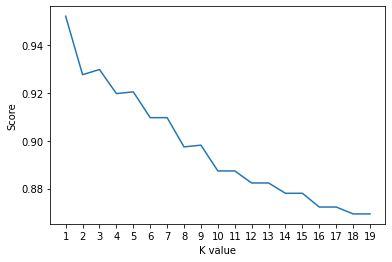

Maximum KNN Score is 95.19%
[[1207    0]
 [ 182    5]]
precision:  0.8689704823614111
recall:  1.0
F1:  0.9298921417565486
CPU times: total: 1min 7s
Wall time: 14.6 s


In [9]:
%%time
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x, y)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
accuracies = {}
acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

y_pred = knn2.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
print("precision: ",cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[1][0]))
print("recall: ",cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1]))
print("F1: ",2*cf_matrix[0][0]/(2*cf_matrix[0][0]+cf_matrix[0][1]+cf_matrix[1][0]))
pair2=(cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1]),cf_matrix[1][0]/(cf_matrix[1][0]+cf_matrix[1][1]))

In [10]:
%%time
from sklearn.tree import DecisionTreeClassifier
param_dist = { 'max_depth': [None]}

dtc = DecisionTreeClassifier(criterion="gini")
#tree_cv = RandomizedSearchCV(dtc, param_dist, cv=5)
dtc.fit(x, y)

acc = dtc.score(x_test, y_test)*100
#print("Tuned Decision Tree Parameters: {}".format(dtc.best_params_))
print("score is {}".format(acc))

y_pred = dtc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
print("precision: ",cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[1][0]))
print("recall: ",cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1]))
print("F1: ",2*cf_matrix[0][0]/(2*cf_matrix[0][0]+cf_matrix[0][1]+cf_matrix[1][0]))
pair3=(cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1]),cf_matrix[1][0]/(cf_matrix[1][0]+cf_matrix[1][1]))

score is 96.91535150645623
[[1196   11]
 [  32  155]]
precision:  0.9739413680781759
recall:  0.9908864954432477
F1:  0.9823408624229979
CPU times: total: 14.8 s
Wall time: 14.9 s


In [11]:
%%time
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x, y)

#Predict the response for test dataset
acc = clf.score(x_test, y_test)*100
print("score is {}".format(acc))


y_pred = clf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
print("precision: ",cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[1][0]))
print("recall: ",cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1]))
print("F1: ",2*cf_matrix[0][0]/(2*cf_matrix[0][0]+cf_matrix[0][1]+cf_matrix[1][0]))
pair4=(cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1]),cf_matrix[1][0]/(cf_matrix[1][0]+cf_matrix[1][1]))

score is 98.42180774748924
[[1204    3]
 [  19  168]]
precision:  0.9844644317252658
recall:  0.9975144987572494
F1:  0.9909465020576131
CPU times: total: 12.5 s
Wall time: 12.5 s


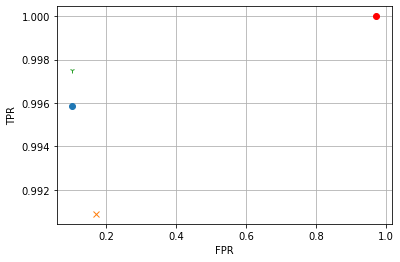

In [12]:
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.plot(pair1[1],pair1[0],'o') 
plt.plot(pair2[1],pair2[0],'ro') 
plt.plot(pair3[1],pair3[0],'x') 
plt.plot(pair4[1],pair4[0],'1') 